In [ ]:
rom google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read images and points
im_src = cv.imread('gdrive/MyDrive/MachineVision/first-image.jpg');
size = im_src.shape
pts_src = np.array([[0,0],[size[1]-1,0],[size[1]-1,size[0]-1],[0,size[0]-1]],dtype=float);
im_dst = cv.imread('gdrive/MyDrive/MachineVision/times-square.jpg');
pts_dst = np.array([[116,217],[283,361],[249,447],[34,334]],dtype=float);
# Calculate Homography between source and destination points
h, status = cv.findHomography(pts_src, pts_dst);
# Warp source image
im_temp = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
# Black out polygonal area in destination image.
cv.fillConvexPoly(im_dst, pts_dst.astype(int), 0);
# Add warped source image to destination image.
im_dst = im_dst + im_temp;
# Display image.
cv_imshow(im_dst);

#수우우우우우우정 findhomography-> SVD방식으로 변경해야함

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read source image.
im = cv.imread('gdrive/MyDrive/MachineVision/book2.jpg')
# Four corners of the book in source image
x = np.array([[141,131,1], [480,159,1], [493,630,1],[64,601,1]])
# Read destination image.
im_ = cv.imread('gdrive/MyDrive/MachineVision/book1.jpg')
# Four corners of the book in destination image.
x_ = np.array([[318,256,1],[534,372,1],[316,670,1],[73,473,1]])
# Calculate Homography
A1 = np.hstack((np.zeros((len(x_),3)),
-np.expand_dims(x_[:,2],axis=1)*x,
np.expand_dims(x_[:,1],axis=1)*x))
A2 = np.hstack((np.expand_dims(x_[:,2],axis=1)*x,
np.zeros((len(x_),3)),
-np.expand_dims(x_[:,0],axis=1)*x))
A = np.vstack((A1, A2))
u, s, vh = np.linalg.svd(A, full_matrices=True)
h = vh[-1,:]/vh[-1,-1];
h = np.reshape(h,(3,3))
# h_, status = cv.findHomography(x, x_)
# Warp source image to destination based on homography
im_out = cv.warpPerspective(im, h, (im_.shape[1],im_.shape[0]))
# Display images
cv_imshow(im), cv_imshow(im_), cv_imshow(im_out)

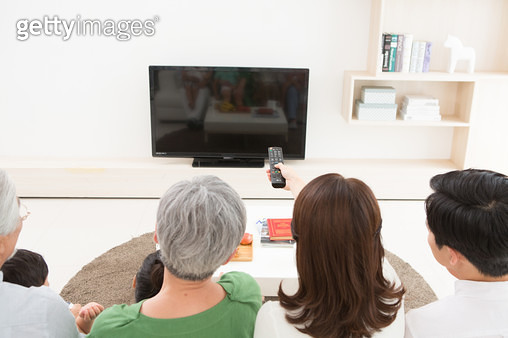

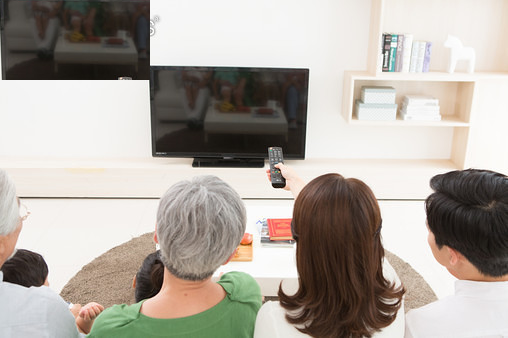

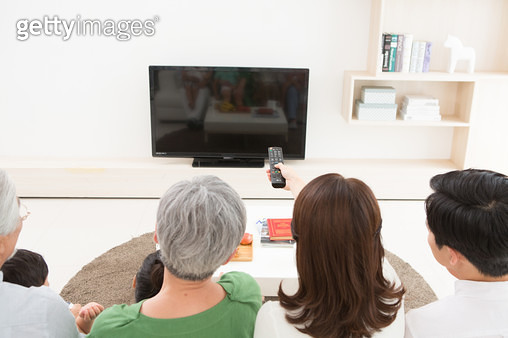

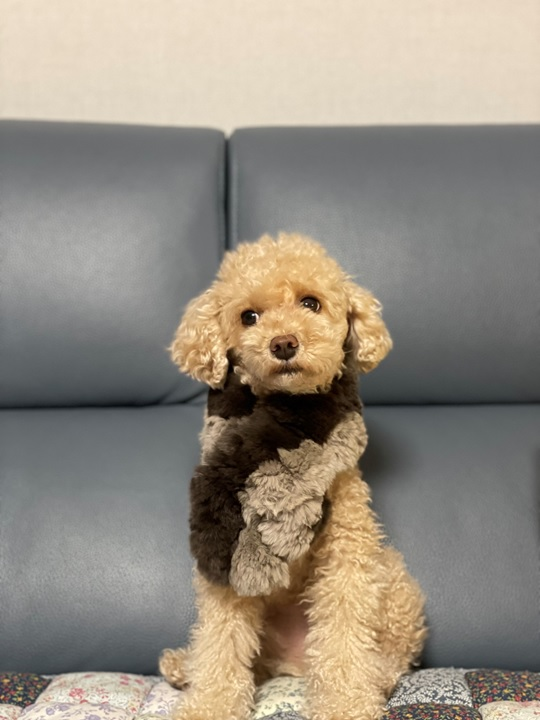

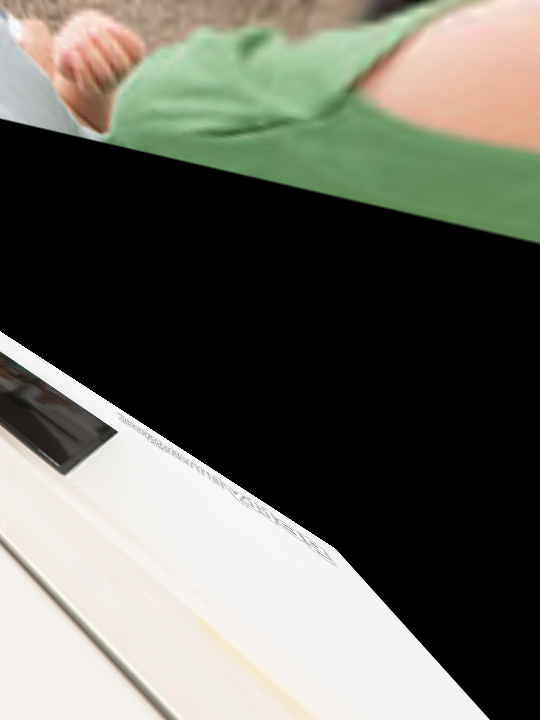

(None, None, None)

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read source image.
im = cv.imread('drive/MyDrive/MachineVision/Re5/tv.jpg')
cv_imshow(im)
imcopy = im.copy()

imcut = im[70:150, 150:300] #좌표
imcopy[0:80, 0:150]= imcut
# Four corners of the book in source image
x = np.array([[70,300,1], [150,300,1], [70,150,1],[150,150,1]])

cv_imshow(imcopy)
# Read destination image.
im_ = cv.imread('drive/MyDrive/MachineVision/Re2/DOG.jpg')
# Four corners of the book in destination image.
x_ = np.array([[0,0,1],[540,0,1],[316,670,1],[73,473,1]])
#cv_imshow(x)
# Calculate Homography
A1 = np.hstack((np.zeros((len(x_),3)),-np.expand_dims(x_[:,2],axis=1)*x,np.expand_dims(x_[:,1],axis=1)*x))
A2 = np.hstack((np.expand_dims(x_[:,2],axis=1)*x,np.zeros((len(x_),3)),-np.expand_dims(x_[:,0],axis=1)*x))
A = np.vstack((A1, A2))
u, s, vh = np.linalg.svd(A, full_matrices=True)
h = vh[-1,:]/vh[-1,-1];
h = np.reshape(h,(3,3))
# h_, status = cv.findHomography(x, x_)
# Warp source image to destination based on homography
im_out = cv.warpPerspective(im, h, (im_.shape[1],im_.shape[0]))
# Display images
cv_imshow(im), cv_imshow(im_), cv_imshow(im_out)

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read images and points
im_src = cv.imread('drive/MyDrive/MachineVision/Re2/DOG.jpg')
size = im_src.shape
pts_src = np.array([[0,0,1],[size[1]-1,0,1],[size[1]-1,size[0]-1,1],[0,size[0]-1,1]],dtype=float);
im_dst = cv.imread('drive/MyDrive/MachineVision/Re5/tv.jpg');
pts_dst = np.array([[153,70,1], [156,150,1], [297,153,1],[305,73,1]],dtype=float);
# Calculate Homography between source and destination points

A1 = np.hstack((np.zeros((len(pts_dst),3)),-np.expand_dims(pts_dst[:,2],axis=1)*pts_src,np.expand_dims(pts_dst[:,1],axis=1)*pts_src))
A2 = np.hstack((np.expand_dims(pts_dst[:,2],axis=1)*pts_src,np.zeros((len(pts_dst),3)),-np.expand_dims(pts_dst[:,0],axis=1)*pts_src))
A = np.vstack((A1, A2))
u, s, vh = np.linalg.svd(A, full_matrices=True)
h = vh[-1,:]/vh[-1,-1];
h = np.reshape(h,(3,3))

print(h)

#h, status = cv.findHomography(pts_src, pts_dst);


# Warp source image
im_temp = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
# Black out polygonal area in destination image.
cv.fillConvexPoly(im_dst, pts_dst.astype(int), 0);
# Add warped source image to destination image.
im_dst = im_dst + im_temp;
# Display image.
cv_imshow(im_dst);

#수우우우우우우정 findhomography-> SVD방식으로 변경해야함

[[ 2.80971682e-02  2.10166352e-01  1.53000000e+02]
 [ 1.70087722e-01  3.87606342e-03  7.00000000e+01]
 [ 1.44431446e-04 -4.06025116e-06  1.00000000e+00]]


error: ignored

[[ 2.80971682e-02  2.10166352e-01  1.53000000e+02]
 [ 1.70087722e-01  3.87606342e-03  7.00000000e+01]
 [ 1.44431446e-04 -4.06025116e-06  1.00000000e+00]]


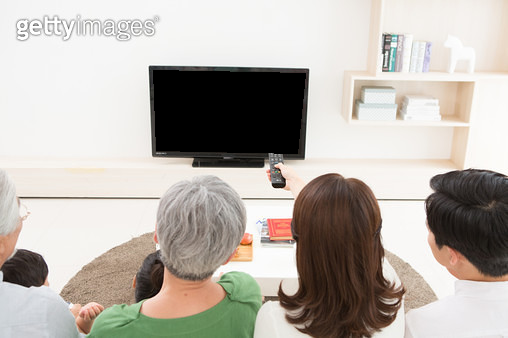

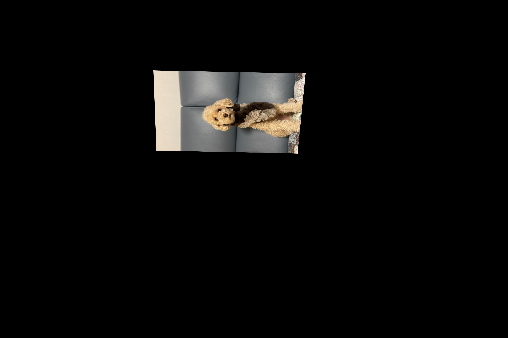

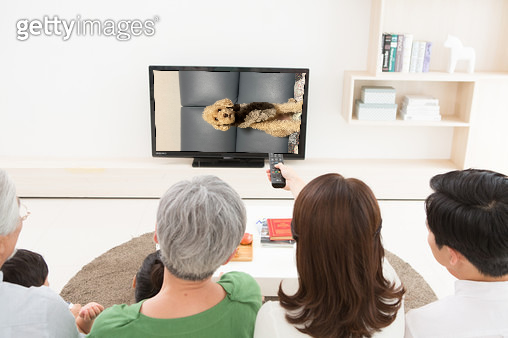

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read images and points
im_src = cv.imread('drive/MyDrive/MachineVision/Re2/DOG.jpg')
size = im_src.shape
pts_src = np.array([[0,0],[size[1]-1,0],[size[1]-1,size[0]-1],[0,size[0]-1]],dtype=float);

im_dst = cv.imread('drive/MyDrive/MachineVision/Re5/tv.jpg');
pts_dst = np.array([[153,70], [156,150], [297,153],[305,73]],dtype=float);
x = np.array([[0,0,1],[size[1]-1,0,1],[size[1]-1,size[0]-1,1],[0,size[0]-1,1]],dtype=float);
x_ = np.array([[153,70,1], [156,150,1], [297,153,1],[305,73,1]],dtype=float);
# Calculate Homography between source and destination points

A1 = np.hstack((np.zeros((len(x_),3)),-np.expand_dims(x_[:,2],axis=1)*x,np.expand_dims(x_[:,1],axis=1)*x))
A2 = np.hstack((np.expand_dims(x_[:,2],axis=1)*x,np.zeros((len(x_),3)),-np.expand_dims(x_[:,0],axis=1)*x))


#A1 = np.hstack((np.zeros((len(pts_dst),3)),-np.expand_dims(pts_dst[:,2],axis=1)*pts_src,np.expand_dims(pts_dst[:,1],axis=1)*pts_src))
#A2 = np.hstack((np.expand_dims(pts_dst[:,2],axis=1)*pts_src,np.zeros((len(pts_dst),3)),-np.expand_dims(pts_dst[:,0],axis=1)*pts_src))
A = np.vstack((A1, A2))
u, s, vh = np.linalg.svd(A, full_matrices=True)
h = vh[-1,:]/vh[-1,-1];
h = np.reshape(h,(3,3))

print(h)
#h, status = cv.findHomography(pts_src, pts_dst);


# Warp source image
im_temp = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
# Black out polygonal area in destination image.
cv.fillConvexPoly(im_dst, pts_dst.astype(int), 0);
cv_imshow(im_dst)
cv_imshow(im_temp)
# Add warped source image to destination image.
im_full = im_dst + im_temp;
# Display image.
cv_imshow(im_full);


In [ ]:
!pip install opencv-contrib-python==4.4.0.44

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
import subprocess
subprocess.call("pip install -U opencv-python".split())
img = cv.imread('drive/MyDrive/MachineVision/Re5/sh3.jpg')
img = cv.resize(img,(480,680))
img2 = cv.imread('drive/MyDrive/MachineVision/Re5/sh4.jpg')
img2 = cv.resize(img2,(480,680));

cv_imshow(img)
cv_imshow(img2)
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
kp2 = sift.detect(gray2,None)
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2=cv.drawKeypoints(gray2,kp2,img2,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv_imshow(img)
cv_imshow(img2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
import subprocess
#subprocess.call("pip install -U opencv-python".split())
img1 = cv.imread('drive/MyDrive/MachineVision/Re5/sh3.jpg')#,cv.IMREAD_GRAYSCALE)
#img1 = cv.resize(img1,(480,640))
img2 = cv.imread('drive/MyDrive/MachineVision/Re5/sh4.jpg')#,cv.IMREAD_GRAYSCALE)
#img2 = cv.resize(img2,(480,640))
# find the keypoints and descriptors
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)  
#print(kp1)
#print(kp2)
#print(des1)
#print(des2)
# Match descriptors.
bf = cv.BFMatcher()
matches = bf.match(des1,des2)
#print(matches)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
#print(matches)
# Draw first 15 matches.
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:30], None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
print(kp1)
print(kp2)
cv_imshow(img3)

Output hidden; open in https://colab.research.google.com to view.

In [42]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv_imshow
# Read source image and points
MIN_MATCH_COUNT = 15
im_src = cv.imread('drive/MyDrive/MachineVision/Re5/sh3.jpg')
#pts_src = np.array(des1)#np.array([[240,187],[40,295],[273,532],[19,656],[301,758],[282,444],[307,304]])
# Read destination image and points
im_dst = cv.imread('drive/MyDrive/MachineVision/Re5/sh4.jpg')
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(im_src,None)
kp2, des2 = sift.detectAndCompute(im_dst,None)  
#pts_dst = np.array(des2)#np.array([[578,202],[389,327],[622,557],[367,673],[655,803],[628,465],[656,315]])
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

else:
    print ("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
# Calculate Homography
#h, status = cv.findHomography(src_pts, dst_pts)
h, status = cv.findHomography(src_pts, dst_pts, cv.RANSAC)#, thresh)
# Warp source image to destination based on homography
im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1] + im_src.shape[1], im_dst.shape[0]))
im_out[0:im_src.shape[0], 0:im_src.shape[1]] = im_dst
cv_imshow(im_out)
